# Comparison of Regression Models on Housing Prices in Ames, IA

### This is an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

The task is to do regression on the housing market in Ames, Iowa to predict the sale price based on 79 different features of both numerical and categorical data. To accomplish this, I will train a scikit-learn model that will output a house's expected sale price when given information about it (features) as input. The best metric to evaluate performance of this model is the Root Mean Square Error (RMSE). There are 1460 house datapoints available to me, and I anticipate on using Linear Regression, Decision Tree Regressor and Random Forest Regressor algorithms for this data. I believe that the most important features to consider for this model will be the square feet, the amount of bedrooms and the year built/renovated. This is because, generally, the larger and newer the house is, the more money it will sell for.

### Get data

In [ ]:
from numpy import dtype
import pandas as pd
import numpy as np

housing  = pd.read_csv("train.csv")

print("Amount of cells in dataframe is:", housing.size)
print(housing.info(verbose=False))

print("Shape of dataframe is:", housing.shape)

print("Amount of categorical features:",housing.select_dtypes(include='object').shape[1])


Amount of cells in dataframe is: 118260
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB
None
Shape of dataframe is: (1460, 81)
Amount of categorical features: 43


Based on this information, we can tell that the dataset is 0.924 MB, has 1460 entries and has a default count of 81 features, including id and SalePrice. Also, there are 43 categorical features, meaning there is then 38 numerical features (including id and SalePrice for now).


In [ ]:
incomplete_rows = housing[housing.isnull().any(axis=1)].head()
print(incomplete_rows)

print("Total amount of missing values:", housing.isnull().sum().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
#Basic descriptive statistics on the features
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##Discover and visualize the data to gain insights


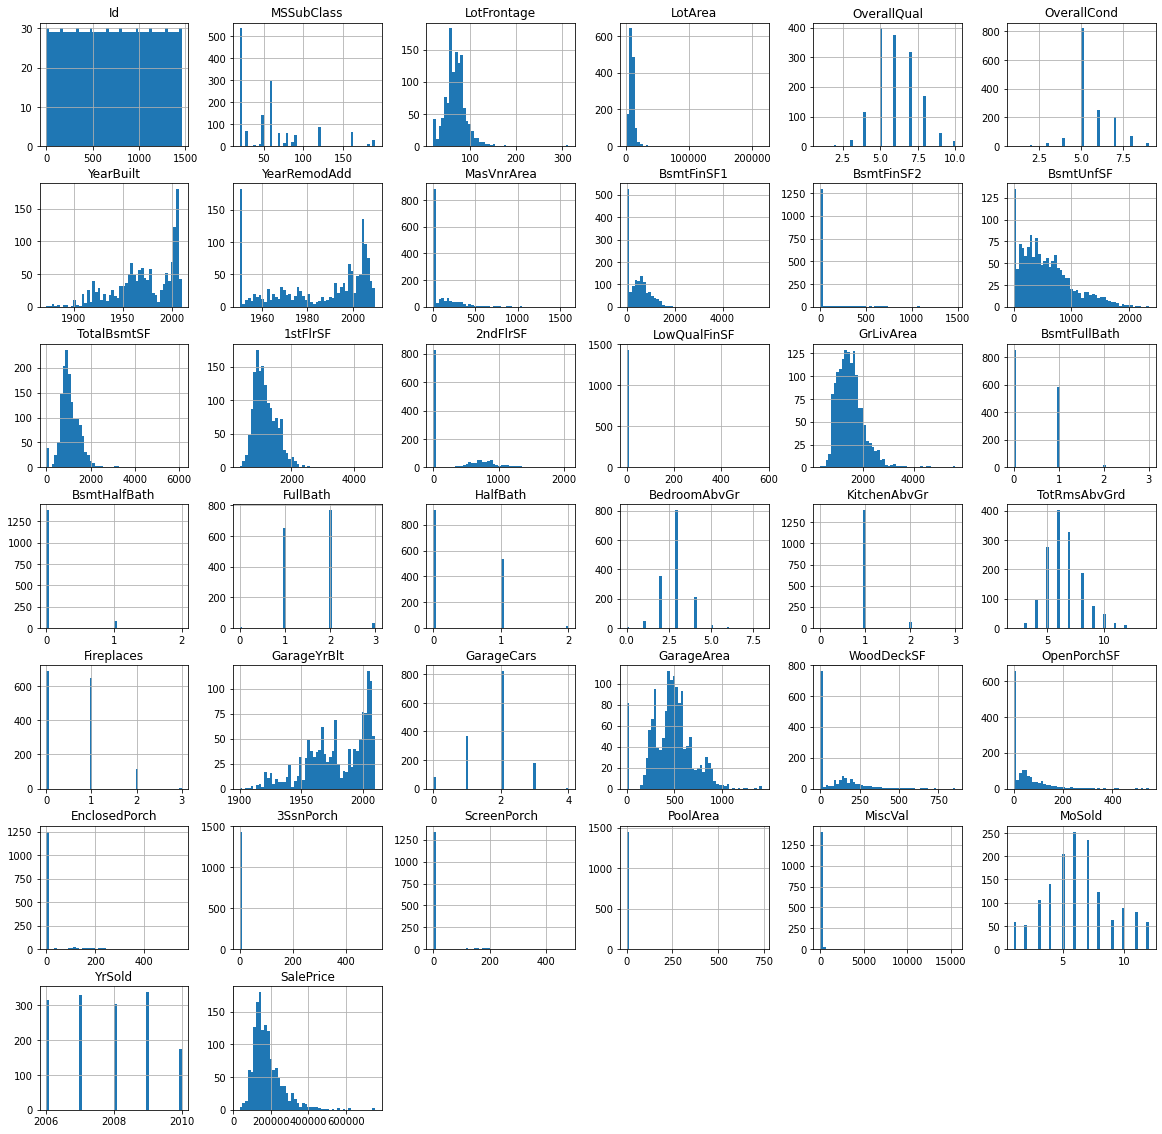

In [ ]:
# Basic Histograms on features to see what their distribution looks like
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,20))
plt.show()

In [ ]:
#Add some new features created by combining existing features
housing['YearBuiltPlusRemod'] = housing['YearBuilt']+housing['YearRemodAdd']
housing['TotalSF1'] = housing['TotalBsmtSF'] + housing['1stFlrSF'] + housing['2ndFlrSF']

housing['TotalSF2'] = housing['BsmtFinSF1'] + housing['BsmtFinSF2'] + housing['1stFlrSF'] + housing['2ndFlrSF']

housing['TotalBaths'] = housing['FullBath'] + (0.5 * housing['HalfBath']) + housing['BsmtFullBath'] + (0.5 * housing['BsmtHalfBath'])

In [ ]:
#Determine most closely correlated features
corr_matrix = housing.corr()
corr_matrix["SalePrice"].sort_values(ascending=False) 

SalePrice             1.000000
OverallQual           0.790982
TotalSF1              0.782260
GrLivArea             0.708624
TotalSF2              0.708047
GarageCars            0.640409
TotalBaths            0.631731
GarageArea            0.623431
TotalBsmtSF           0.613581
1stFlrSF              0.605852
YearBuiltPlusRemod    0.576144
FullBath              0.560664
TotRmsAbvGrd          0.533723
YearBuilt             0.522897
YearRemodAdd          0.507101
GarageYrBlt           0.486362
MasVnrArea            0.477493
Fireplaces            0.466929
BsmtFinSF1            0.386420
LotFrontage           0.351799
WoodDeckSF            0.324413
2ndFlrSF              0.319334
OpenPorchSF           0.315856
HalfBath              0.284108
LotArea               0.263843
BsmtFullBath          0.227122
BsmtUnfSF             0.214479
BedroomAbvGr          0.168213
ScreenPorch           0.111447
PoolArea              0.092404
MoSold                0.046432
3SsnPorch             0.044584
BsmtFinS

In [ ]:
#To make things easier - let's drop all the features that have a correlation coefficient less than |0.25| with SalePrice
low_corr_matrix = corr_matrix["SalePrice"][abs(corr_matrix["SalePrice"]) < 0.25]
print(low_corr_matrix)
for col in low_corr_matrix.index:
  housing = housing.drop([col], axis=1) 

print("New amount of features:", housing.shape[1])

Id              -0.021917
MSSubClass      -0.084284
OverallCond     -0.077856
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
LowQualFinSF    -0.025606
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64
New amount of features: 68


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad62705690>,
      dtype=object)

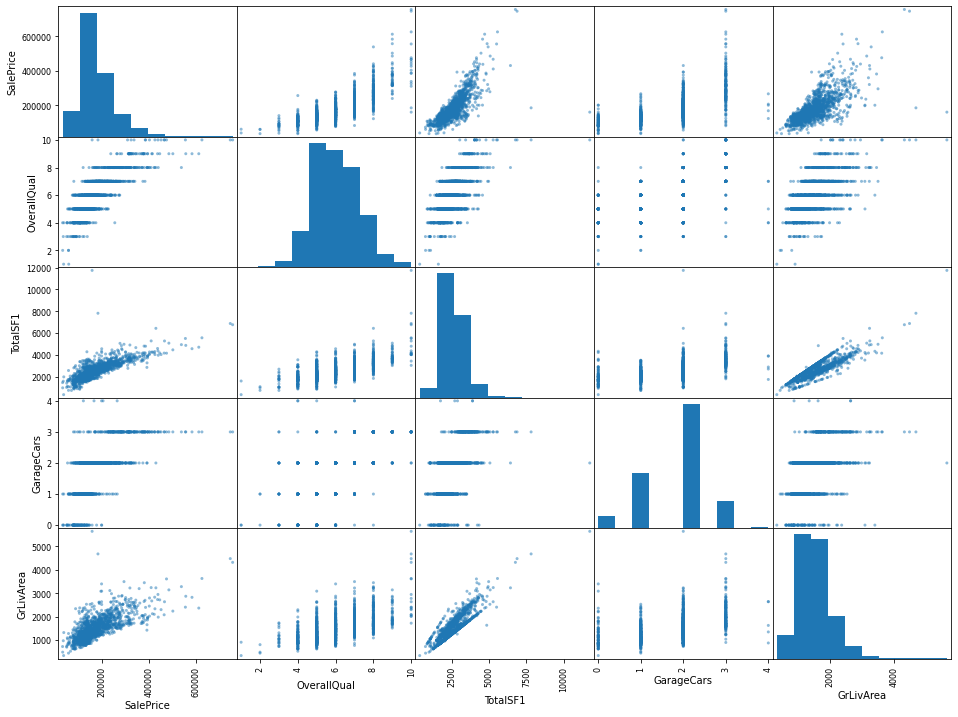

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice","OverallQual","TotalSF1", "GarageCars", "GrLivArea"]
scatter_matrix(housing[attributes], figsize=(16, 12))

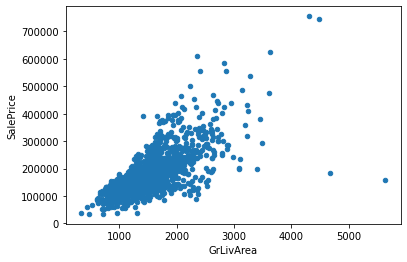

In [ ]:
#Look for outliers 
#this scatter plot of a highly correlated feature (living area in sq. ft) shows some possible outliers
qual_scatter = housing.plot(kind="scatter",x="GrLivArea",y="SalePrice")

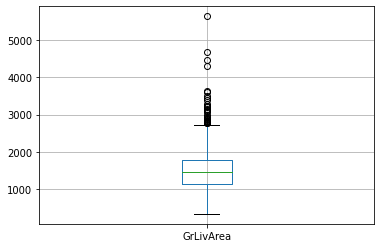

In [ ]:
boxplot = housing.boxplot(column="GrLivArea") #at least 4 probable outliers

This boxplot shows a right-skewed distribution, and 4 potential outliers above the rest of the data, past 4500, so let's remove these outliers.

In [ ]:
print(housing.shape)
housing = housing[housing["GrLivArea"] < 4500] #remove data points with a significantly larger living area than the rest of the dataset
print(housing.shape)

(1460, 68)
(1458, 68)


Skewness: 1.8812964895244009


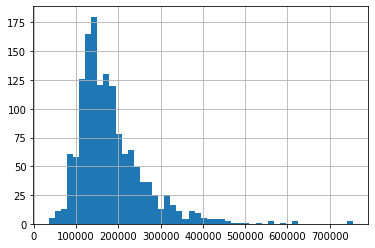

In [ ]:
import seaborn as sns
housing['SalePrice'].hist(bins = 50)
print("Skewness:", housing['SalePrice'].skew())

As you can see with this graph, the center of the bellcurve seems to be left-justified, and the boxplot shows a right skewed distribution. This is proven by the call to .skew(); this shows a value over 1, which indicates a highly skewed distribution.

In [ ]:
# Now save SalePrice to separate var
y = housing['SalePrice']#save to y

housing = housing.drop(['SalePrice'], axis=1)

Upon previous iterations of running this model, I found a few categorical features that had low correlations and importance scores with my final model, so I decided to drop them from the dataset

In [ ]:
housing = housing.drop(['GarageCond', 'Neighborhood', 'BsmtCond', 'Functional', 'HeatingQC', 'PoolQC', 'LandSlope', 'Fence', 'CentralAir', 'Alley', 'Utilities', 'LotConfig', 'BsmtExposure', 'SaleType', 'KitchenQual', 'ExterQual', 'Electrical', 'ExterCond', 'GarageQual', 'FireplaceQu', 'Condition2', 'LotShape', 'GarageFinish', 'BldgType', 'MiscFeature', 'PavedDrive', 'SaleCondition', 'GarageType','LandContour','Heating','RoofMatl','RoofStyle'], axis=1)
housing.shape
 

(1458, 35)

## Data Preparation and Cleaning

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_and_valid_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# then out of the overall 80%, split into training and validation set (.1875*.8 = 15% of overall data)
train_set, valid_set = train_test_split(train_and_valid_set, test_size=0.1875, random_state=42)
print(housing.shape)
print(train_set.shape)
print(valid_set.shape)
print(test_set.shape)

(1458, 35)
(947, 35)
(219, 35)
(292, 35)


This means that the test set takes up 20% of the data, the validation set takes up 15% and the train set is the remaining 65% of the data

In [ ]:
# Check to see if there's any missing value in the data with .isnull()
housing_cat = housing.select_dtypes(include="object")
housing_num = housing.select_dtypes(exclude="object")

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
housing.isnull().sum().sum()

468

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

preprocessor = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
housing_prepared = preprocessor.fit_transform(housing)
print(housing.shape)
print(housing_prepared.shape)

print(pd.DataFrame(housing_prepared).isnull().sum().sum()) #this confirms that the simple imputer works

(1458, 35)
(1458, 109)
0


In [ ]:
#Partition prepared data into correct sets
len_test_set = test_set.shape[0]
test_housing=housing_prepared[:len_test_set]
train_housing = housing_prepared[len_test_set:]
#print(train_housing.shape)
test_labels = y[:len_test_set]
train_labels = y[len_test_set:]

print(train_housing.shape)

(1166, 109)


## Model Selection

In [ ]:
# Try LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(train_housing, train_labels)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(train_housing)
lin_mse = mean_squared_error(train_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

25985.14567515459

In [ ]:
#Function from Colab 02 End-to-end ML project
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
#5 Fold CV on LinReg
lin_scores = cross_val_score(lin_reg, train_housing, train_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.07315793e+15 3.73706439e+13 3.08707546e+04 1.45703782e+13
 1.09523668e+15]
Mean: 444067126669602.6
Standard deviation: 522846464406748.4


In [ ]:
#Try DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_housing, train_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
housing_predictions = tree_reg.predict(train_housing)
tree_mse = mean_squared_error(train_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

222.82405430444976

In [ ]:
#5 Fold CV on DecisionTreeRegressor
scores = cross_val_score(tree_reg, train_housing, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [45724.21500067 43599.80987654 37409.22981053 41743.47309224
 41507.04577337]
Mean: 41996.754710669884
Standard deviation: 2750.0217166135835


In [ ]:
#RandomTreeRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_housing, train_labels)

RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(train_housing)
forest_mse = mean_squared_error(train_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

9556.459366472001

In [ ]:
#5 fold CV on RandomTreeRegressor
forest_scores = cross_val_score(forest_reg, train_housing, train_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [26134.66867104 28286.71215399 26222.38418273 27731.09535471
 26047.76805181]
Mean: 26884.525682857355
Standard deviation: 936.3426025346242


In [ ]:
#This isn't bad error, but let's try another model - XGB Regressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor(seed=42, verbosity=0)

xgb_model.fit(train_housing, train_labels)
housing_predictions = xgb_model.predict(train_housing)
xgb_err = mean_squared_error(train_labels, housing_predictions)
xgb_err = np.sqrt(xgb_err)
xgb_err

15549.382954785451

In [ ]:
#5 fold CV on XGB
xgb_scores = cross_val_score(xgb_model, train_housing, train_labels,
                                scoring="neg_mean_squared_error", cv=5)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)
#This model didn't turn out to be as good as RandomTreeRegressor

Scores: [24554.07947534 27115.40925717 24161.83317562 24198.62001351
 24714.29773224]
Mean: 24948.84793077688
Standard deviation: 1103.3655842707594


## Model Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [100, 120, 140], 'max_features': [30, 40, 60]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [110, 130], 'max_features': [35, 45, 55]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_housing, train_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [30, 40, 60],
                          'n_estimators': [100, 120, 140]},
                         {'bootstrap': [False], 'max_features': [35, 45, 55],
                          'n_estimators': [110, 130]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print(grid_search.best_params_)
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

{'bootstrap': False, 'max_features': 35, 'n_estimators': 110}
25757.849084914506 {'max_features': 30, 'n_estimators': 100}
25767.290485621674 {'max_features': 30, 'n_estimators': 120}
25844.934091428666 {'max_features': 30, 'n_estimators': 140}
26110.689139967042 {'max_features': 40, 'n_estimators': 100}
26105.106064972377 {'max_features': 40, 'n_estimators': 120}
25957.67895326481 {'max_features': 40, 'n_estimators': 140}
26362.367239418476 {'max_features': 60, 'n_estimators': 100}
26465.957336395164 {'max_features': 60, 'n_estimators': 120}
26387.212236430496 {'max_features': 60, 'n_estimators': 140}
25351.185292284154 {'bootstrap': False, 'max_features': 35, 'n_estimators': 110}
25358.06064759411 {'bootstrap': False, 'max_features': 35, 'n_estimators': 130}
25871.782833280784 {'bootstrap': False, 'max_features': 45, 'n_estimators': 110}
25727.24986197758 {'bootstrap': False, 'max_features': 45, 'n_estimators': 130}
26763.040100639475 {'bootstrap': False, 'max_features': 55, 'n_estim

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=50, high=150),
        'max_features': randint(low=10, high=70),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_housing, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fad61fcf590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fad61f91a50>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
print(rnd_search.best_params_)
cvres = rnd_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

{'max_features': 30, 'n_estimators': 132}
25961.35904553209 {'max_features': 48, 'n_estimators': 101}
25965.047105612066 {'max_features': 38, 'n_estimators': 64}
26014.382749378845 {'max_features': 52, 'n_estimators': 121}
25741.633484948383 {'max_features': 30, 'n_estimators': 132}
25965.655437257275 {'max_features': 32, 'n_estimators': 124}
26212.99929251244 {'max_features': 20, 'n_estimators': 137}
26111.94813842831 {'max_features': 62, 'n_estimators': 149}
25894.551008886254 {'max_features': 49, 'n_estimators': 73}
26354.345104148262 {'max_features': 12, 'n_estimators': 71}
26339.15096360438 {'max_features': 62, 'n_estimators': 51}


In [ ]:
#Find importance scores for attributes
sorted(zip(rnd_search.best_estimator_.feature_importances_, (num_attribs+cat_attribs)), reverse=True)

[(0.21523196540044237, 'OverallQual'),
 (0.21320099015935945, 'TotalSF1'),
 (0.13754682308635424, 'TotalSF2'),
 (0.05490247216393561, 'GrLivArea'),
 (0.05001723285124826, 'TotalBsmtSF'),
 (0.041152492245770396, 'YearBuilt'),
 (0.034913095665882646, 'GarageCars'),
 (0.034306879125408536, 'YearBuiltPlusRemod'),
 (0.027428978381032757, 'TotalBaths'),
 (0.024707600308108743, '1stFlrSF'),
 (0.016109756360054142, 'GarageArea'),
 (0.013872688677001312, '2ndFlrSF'),
 (0.013098806101306525, 'BsmtFinSF1'),
 (0.012683465484036609, 'GarageYrBlt'),
 (0.010818209633855791, 'LotArea'),
 (0.010520314599925445, 'YearRemodAdd'),
 (0.00978689347604223, 'FullBath'),
 (0.007465942832216957, 'TotRmsAbvGrd'),
 (0.005958984042628465, 'Fireplaces'),
 (0.005829240492019341, 'MasVnrArea'),
 (0.005767810167699787, 'LotFrontage'),
 (0.004063922861775913, 'OpenPorchSF'),
 (0.0039123515388718305, 'WoodDeckSF'),
 (0.0013013341436480593, 'HalfBath'),
 (0.0010102566697519552, 'Exterior1st'),
 (0.001001109118516968, 'Ho

In [ ]:
#Run on test set
#Ensure test labells are fine

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_housing)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

26141.441908815737

In [ ]:
#Look at MAE
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(test_labels, final_predictions)
lin_mae

17577.059308841843

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - test_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([22479.65468976, 29349.87385276])

My solution to this project predicted the prices of housing in Ames, Iowa, and had an average error of \$26,141. This means that given a house, my solution will, on average, predict its Sale Price within \$26,141. I tried to implement other models such as Gradient Boosting Algorithms like XGBRegressor, but I had trouble tuning them to have lower errors than RandomForestRegressor. I also tried to normalize the distribution of Sale Price, but I could not see how to do so without disrupting the data and negatively affecting my model. I learned that data cleaning and tuning hyperparameters is a difficult, time-consuming process; if I had more time I would test different sets of features and different hyperparameters to improve my model. However, I still learned a lot about the entire process of building a machine learning model and I'm satisfied with my positive results.